In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyzing all CoT for Bongard-Hoi with high image detail

In [2]:
all_cotN = [
    'chain_of_thought0',
    'chain_of_thought1',
    'chain_of_thought2',
    'chain_of_thought3',
    'chain_of_thought0_swap'
]
data = pd.DataFrame()

for cotN in all_cotN:
    test_conditions = [
        'test_seen_obj_seen_act',
        'test_seen_obj_unseen_act',
        'test_unseen_obj_seen_act',
        'test_unseen_obj_unseen_act'
    ]

    for test_condition in test_conditions:
        data_test_condition = pd.read_csv(f'results/{cotN}/{test_condition}_fewshot_results.csv')
        data_test_condition['cotN'] = cotN
        data = pd.concat([data, data_test_condition])

In [11]:
def only_ten_per_concept(rows_concept):
    if len(rows_concept) >= 10:
        rows_concept = rows_concept.reset_index(drop=True).loc[:9]
    return rows_concept


hoitrans = {
    # 'test_seen_obj_seen_act': 59.5,
    # 'test_seen_obj_unseen_act': 63.1,
    # 'test_unseen_obj_seen_act': 64.38,
    # 'test_unseen_obj_unseen_act': 62.87,
    'average_accuracy': 62.46
}
hoitrans = pd.DataFrame.from_dict(hoitrans, orient='index')
hoitrans.columns = ['accuracy']
hoitrans = hoitrans.reset_index().rename(columns={'index': 'test_condition'})
hoitrans['agent'] = 'HOITrans'

human = {
    # 'test_seen_obj_seen_act': 87.21,
    # 'test_seen_obj_unseen_act': 93.61,
    # 'test_unseen_obj_seen_act': 90.01,
    # 'test_unseen_obj_unseen_act': 94.85,
    'average_accuracy': 91.42
}
human = pd.DataFrame.from_dict(human, orient='index')
human.columns = ['accuracy']
human = human.reset_index().rename(columns={'index': 'test_condition'})
human['agent'] = 'Human Data'

all_accuracy_by_test_condition = pd.concat([hoitrans, human])
all_accuracy_by_test_condition['accuracy'] = all_accuracy_by_test_condition['accuracy'] / 100


for cotN in all_cotN:
    data_cotN = data[data.cotN == cotN].dropna()
    data_cotN = data_cotN.groupby(['concept']).apply(only_ten_per_concept)

    print('Condition:', cotN)
    print('Shape:', data_cotN.shape)
    # print('Columns:', data_cotN.columns)

    print('Number of Unique Concepts:', len(data_cotN.concept.unique()))
    # print('Counts per concept, max to min:', data_cotN.concept.value_counts().sort_values(ascending=False))
    print('Unique counts per concept:', data_cotN.concept.value_counts().unique())

    # overall_accuracy = data_cotN.groupby(['test_condition']).accuracy.mean().mean()
    overall_accuracy = data_cotN.accuracy.mean()
    print('Overall Accuracy:', overall_accuracy)

    accuracy_by_test_condition = data_cotN[['test_condition', 'accuracy','concept']]
    # accuracy_by_test_condition.loc[len(accuracy_by_test_condition.index)] = [
    #     'average_accuracy',
    #     overall_accuracy
    # ]

    accuracy_by_test_condition['agent'] = f'Chain of Thought {cotN[-1]}' if cotN != 'chain_of_thought0_swap' else 'Chain of Thought 0 (swapped class labels)'
    # print('Accuracy by Test Condition:', accuracy_by_test_condition)
    # print()

    all_accuracy_by_test_condition = pd.concat(
        [all_accuracy_by_test_condition, accuracy_by_test_condition], 
        ignore_index=True
    )

# custom_order = [
#     'HOITrans',
#     'Chain of Thought 0',
#     'Chain of Thought 1',
#     'Chain of Thought 2',
#     'Chain of Thought 3',
#     'Human Data'
# ]
# all_accuracy_by_test_condition['agent'] = pd.Categorical(
#     all_accuracy_by_test_condition['agent'],
#     categories=custom_order,
#     ordered=True
# )

display(all_accuracy_by_test_condition)

Condition: chain_of_thought0
Shape: (0, 18)
Number of Unique Concepts: 0
Unique counts per concept: []
Overall Accuracy: nan
chain_of_thought0
Condition: chain_of_thought1
Shape: (0, 18)
Number of Unique Concepts: 0
Unique counts per concept: []
Overall Accuracy: nan
chain_of_thought1
Condition: chain_of_thought2
Shape: (0, 18)
Number of Unique Concepts: 0
Unique counts per concept: []
Overall Accuracy: nan
chain_of_thought2
Condition: chain_of_thought3
Shape: (0, 18)
Number of Unique Concepts: 0
Unique counts per concept: []
Overall Accuracy: nan
chain_of_thought3
Condition: chain_of_thought0_swap
Shape: (1152, 18)
Number of Unique Concepts: 162
Unique counts per concept: [10  8  7  6  5  4  3  2  1]
Overall Accuracy: 0.7335069444444444
chain_of_thought0_swap


/tmp/ipykernel_1068432/625342444.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_by_test_condition['agent'] = f'Chain of Thought {cotN[-1]}' if cotN != 'chain_of_thought0_swap' else 'Chain of Thought 0 (swapped class labels)'


,test_condition,accuracy,agent,concept
0,average_accuracy,0.6246,HOITrans,NaN
1,average_accuracy,0.9142,Human Data,NaN
2,test_unseen_obj_unseen_act,1.0000,Chain of Thought 0 (swapped class labels),adjust_or_tie++tie
3,test_unseen_obj_unseen_act,1.0000,Chain of Thought 0 (swapped class labels),adjust_or_tie++tie
4,test_unseen_obj_unseen_act,0.0000,Chain of Thought 0 (swapped class labels),adjust_or_tie++tie
...,...,...,...,...
1149,test_unseen_obj_unseen_act,1.0000,Chain of Thought 0 (swapped class labels),wear++tie
1150,test_unseen_obj_unseen_act,1.0000,Chain of Thought 0 (swapped class labels),wear++tie
1151,test_unseen_obj_unseen_act,0.0000,Chain of Thought 0 (swapped class labels),wear++tie
1152,test_unseen_obj_unseen_act,1.0000,Chain of Thought 0 (swapped class labels),wear++tie


In [12]:
hoitrans = {
    # 'test_seen_obj_seen_act': 59.5,
    # 'test_seen_obj_unseen_act': 63.1,
    # 'test_unseen_obj_seen_act': 64.38,
    # 'test_unseen_obj_unseen_act': 62.87,
    'average_accuracy': 62.46
}
hoitrans = pd.DataFrame.from_dict(hoitrans, orient='index')
hoitrans.columns = ['accuracy']
hoitrans = hoitrans.reset_index().rename(columns={'index': 'test_condition'})
hoitrans['agent'] = 'HOITrans'
hoitrans['cotN'] = 'chain_of_thought0'

human = {
    # 'test_seen_obj_seen_act': 87.21,
    # 'test_seen_obj_unseen_act': 93.61,
    # 'test_unseen_obj_seen_act': 90.01,
    # 'test_unseen_obj_unseen_act': 94.85,
    'average_accuracy': 91.42
}
human = pd.DataFrame.from_dict(human, orient='index')
human.columns = ['accuracy']
human = human.reset_index().rename(columns={'index': 'test_condition'})
human['agent'] = 'Humans'
human['cotN'] = 'chain_of_thought0'

In [13]:
# Define all data
all_data = pd.concat([hoitrans, human])
all_data['accuracy'] = all_data['accuracy'] / 100

# Extract important things from data for each chain of thought condition
for model in ['gpt-4o', 'gpt-4-vision-preview']:
    for cotN in all_cotN:

        # Get model's performance
        model_cot = data[(data.cotN == cotN) & (data.agent == model)]

        def only_ten_per_concept(rows_concept):
            if len(rows_concept) >= 10:
                rows_concept = rows_concept.reset_index(drop=True).loc[:9]
            return rows_concept
        model_cot = model_cot.groupby(['concept']).apply(only_ten_per_concept)
        model_cot = model_cot[['test_condition', 'accuracy','concept','agent','cotN']]
        all_data = pd.concat([all_data, model_cot], ignore_index=True)

        print('Model:', model)
        print('Condition:', cotN)
        print('Shape:', model_cot.shape)
        print('Number of Unique Concepts:', len(model_cot.concept.unique()))
        print('Unique counts per concept:', model_cot.concept.value_counts().unique())
        print('Overall Accuracy:', model_cot.accuracy.mean())
        print()

# custom_order = [
#     'HOITrans',
#     'gpt-4o',
#     'gpt-4-vision-preview',
#     'Humans'
# ]
# all_data['agent'] = pd.Categorical(all_data['agent'], categories=custom_order, ordered=True)
# display(all_data)

AttributeError: 'DataFrame' object has no attribute 'agent'

In [10]:
all_accuracy_by_test_condition.agent.unique()

array(['HOITrans', 'Human Data',
       'Chain of Thought 0 (swapped class labels)'], dtype=object)

In [6]:
all_accuracy_by_test_condition.to_csv('gpt-4-vision-preview_bongard_hoi.csv')

([<matplotlib.axis.XTick at 0x7fd61202a510>,
 [Text(0, 0, 'Seen object\nSeen action'),
  Text(1, 0, 'Seen object\nUnseen action'),
  Text(2, 0, 'Unseen object\nSeen action'),
  Text(3, 0, 'Unseen object\nUnseen action')])

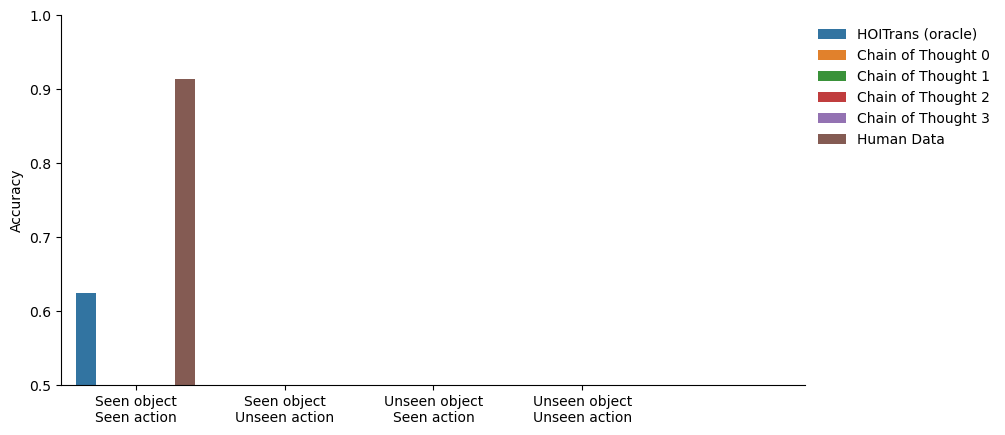

In [5]:
fig = plt.figure(figsize = (6.4*1.5, 4.8))
sns.barplot(
    data = all_accuracy_by_test_condition,
    x = 'test_condition',
    y = 'accuracy',
    hue = 'agent',  
    errorbar = ('ci', 95)
).set(
    xlabel = '',
    ylabel = 'Accuracy',
    ylim = (0.5,1)
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)).get_frame().set_linewidth(0.0)
sns.despine()

plt.xticks(
    [0,1,2,3],
    [
        'Seen object\nSeen action',
        'Seen object\nUnseen action',
        'Unseen object\nSeen action',
        'Unseen object\nUnseen action'
    ],
)

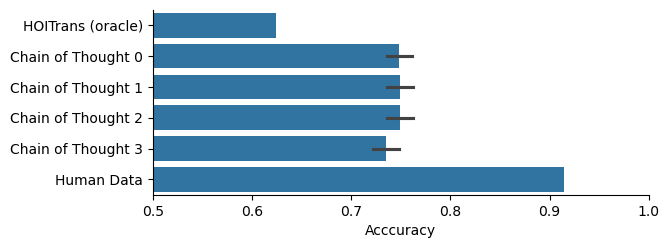

In [7]:
def standard_error_proportion(group):
    count = group.sum()
    nobs = len(group)
    p = count / nobs
    sep = np.sqrt(p * (1 - p) / nobs)
    return p - sep, p + sep

plt.figure(figsize = (6.4, 4.8*2/4))
sns.barplot(
    data = all_accuracy_by_test_condition,
    x = 'accuracy',
    y = 'source',
    errorbar = lambda x: standard_error_proportion(x)
).set(
    xlabel = 'Acccuracy',
    ylabel = '',
    xlim = (0.5,1)
)
sns.despine()

In [35]:
all_accuracy_by_test_condition[(all_accuracy_by_test_condition.test_condition == 'test_seen_obj_seen_act') & (all_accuracy_by_test_condition.source == 'Chain of Thought 1')]

,index,test_condition,accuracy,source
1272,1272.0,test_seen_obj_seen_act,1.0,Chain of Thought 1
1273,1273.0,test_seen_obj_seen_act,1.0,Chain of Thought 1
1274,1274.0,test_seen_obj_seen_act,0.0,Chain of Thought 1
1275,1275.0,test_seen_obj_seen_act,0.0,Chain of Thought 1
2710,NaN,test_seen_obj_seen_act,NaN,Chain of Thought 1
